In [126]:
# importing libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from pylab import rcParams
from scipy.stats import spearmanr
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import Imputer

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [127]:
df=pd.read_csv("Computers.csv")


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
S.No.      6259 non-null int64
price      6259 non-null int64
speed      6259 non-null int64
hd         6259 non-null int64
ram        6259 non-null int64
screen     6259 non-null int64
cd         6259 non-null object
multi      6259 non-null object
premium    6259 non-null object
ads        6259 non-null int64
trend      6259 non-null int64
dtypes: int64(8), object(3)
memory usage: 538.0+ KB


In [129]:
cdNum={"yes":1,"no":0}

In [130]:
df.cd=[cdNum[i] for i in df.cd]

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
S.No.      6259 non-null int64
price      6259 non-null int64
speed      6259 non-null int64
hd         6259 non-null int64
ram        6259 non-null int64
screen     6259 non-null int64
cd         6259 non-null int64
multi      6259 non-null object
premium    6259 non-null object
ads        6259 non-null int64
trend      6259 non-null int64
dtypes: int64(9), object(2)
memory usage: 538.0+ KB


In [132]:
multi1={"yes":1,"no":0}
df.multi=[multi1[item] for item in df.multi]
df

,S.No.,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,0,0,yes,94,1
1,2,1795,33,85,2,14,0,0,yes,94,1
2,3,1595,25,170,4,15,0,0,yes,94,1
3,4,1849,25,170,8,14,0,0,no,94,1
4,5,3295,33,340,16,14,0,0,yes,94,1
5,6,3695,66,340,16,14,0,0,yes,94,1
6,7,1720,25,170,4,14,1,0,yes,94,1
7,8,1995,50,85,2,14,0,0,yes,94,1
8,9,2225,50,210,8,14,0,0,yes,94,1
9,10,2575,50,210,4,15,0,0,yes,94,1


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
S.No.      6259 non-null int64
price      6259 non-null int64
speed      6259 non-null int64
hd         6259 non-null int64
ram        6259 non-null int64
screen     6259 non-null int64
cd         6259 non-null int64
multi      6259 non-null int64
premium    6259 non-null object
ads        6259 non-null int64
trend      6259 non-null int64
dtypes: int64(10), object(1)
memory usage: 538.0+ KB


In [134]:
premium1={"yes":1,"no":0}
df.premium=[premium1[item] for item in df.premium]
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
S.No.      6259 non-null int64
price      6259 non-null int64
speed      6259 non-null int64
hd         6259 non-null int64
ram        6259 non-null int64
screen     6259 non-null int64
cd         6259 non-null int64
multi      6259 non-null int64
premium    6259 non-null int64
ads        6259 non-null int64
trend      6259 non-null int64
dtypes: int64(11)
memory usage: 538.0 KB


In [135]:
df.describe()

,S.No.,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,3130.000000,2219.576610,52.011024,416.601694,8.286947,14.608723,0.464611,0.139479,0.902221,221.301007,15.926985
std,1806.961999,580.803956,21.157735,258.548445,5.631099,0.905115,0.498786,0.346474,0.297040,74.835284,7.873984
min,1.000000,949.000000,25.000000,80.000000,2.000000,14.000000,0.000000,0.000000,0.000000,39.000000,1.000000
25%,1565.500000,1794.000000,33.000000,214.000000,4.000000,14.000000,0.000000,0.000000,1.000000,162.500000,10.000000
50%,3130.000000,2144.000000,50.000000,340.000000,8.000000,14.000000,0.000000,0.000000,1.000000,246.000000,16.000000
75%,4694.500000,2595.000000,66.000000,528.000000,8.000000,15.000000,1.000000,0.000000,1.000000,275.000000,21.500000
max,6259.000000,5399.000000,100.000000,2100.000000,32.000000,17.000000,1.000000,1.000000,1.000000,339.000000,35.000000


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
S.No.      6259 non-null int64
price      6259 non-null int64
speed      6259 non-null int64
hd         6259 non-null int64
ram        6259 non-null int64
screen     6259 non-null int64
cd         6259 non-null int64
multi      6259 non-null int64
premium    6259 non-null int64
ads        6259 non-null int64
trend      6259 non-null int64
dtypes: int64(11)
memory usage: 538.0 KB


In [137]:
# df.drop('S.No.', axis=1, inplace=True)

In [138]:
#df1 = pd.DataFrame({'screen': ['14', '15', '17']})

#pd.get_dummies(df1,prefix=['screen'])

df=pd.get_dummies(df, columns=["screen"])

In [139]:

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 13 columns):
S.No.        6259 non-null int64
price        6259 non-null int64
speed        6259 non-null int64
hd           6259 non-null int64
ram          6259 non-null int64
cd           6259 non-null int64
multi        6259 non-null int64
premium      6259 non-null int64
ads          6259 non-null int64
trend        6259 non-null int64
screen_14    6259 non-null uint8
screen_15    6259 non-null uint8
screen_17    6259 non-null uint8
dtypes: int64(10), uint8(3)
memory usage: 507.4 KB


In [140]:
def hd_new(x):
    if type(x)==int:
        if x <=170:
            return 0
        else:
            return 1

df['hd_binary']=df['hd'].apply(hd_new)
df.head()

,S.No.,price,speed,hd,ram,cd,multi,premium,ads,trend,screen_14,screen_15,screen_17,hd_binary
0,1,1499,25,80,4,0,0,1,94,1,1,0,0,0
1,2,1795,33,85,2,0,0,1,94,1,1,0,0,0
2,3,1595,25,170,4,0,0,1,94,1,0,1,0,0
3,4,1849,25,170,8,0,0,0,94,1,1,0,0,0
4,5,3295,33,340,16,0,0,1,94,1,1,0,0,1


In [141]:
df.drop('hd', axis=1, inplace=True)

In [142]:
df.drop('trend', axis=1, inplace=True)

In [143]:
df.drop('multi', axis=1, inplace=True)

In [144]:
df.head()

,S.No.,price,speed,ram,cd,premium,ads,screen_14,screen_15,screen_17,hd_binary
0,1,1499,25,4,0,1,94,1,0,0,0
1,2,1795,33,2,0,1,94,1,0,0,0
2,3,1595,25,4,0,1,94,0,1,0,0
3,4,1849,25,8,0,0,94,1,0,0,0
4,5,3295,33,16,0,1,94,1,0,0,1


In [145]:
df.isnull().sum()

S.No.        0
price        0
speed        0
ram          0
cd           0
premium      0
ads          0
screen_14    0
screen_15    0
screen_17    0
hd_binary    0
dtype: int64

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
S.No.        6259 non-null int64
price        6259 non-null int64
speed        6259 non-null int64
ram          6259 non-null int64
cd           6259 non-null int64
premium      6259 non-null int64
ads          6259 non-null int64
screen_14    6259 non-null uint8
screen_15    6259 non-null uint8
screen_17    6259 non-null uint8
hd_binary    6259 non-null int64
dtypes: int64(8), uint8(3)
memory usage: 409.6 KB


In [147]:
df.corr()

,S.No.,price,speed,ram,cd,premium,ads,screen_14,screen_15,screen_17,hd_binary
S.No.,1.000000,-0.199924,0.388566,0.265376,0.458642,0.037364,-0.272714,-0.219054,0.168148,0.100139,0.350081
price,-0.199924,1.000000,0.300976,0.622748,0.197343,-0.080696,0.054540,-0.278018,0.153539,0.221398,0.306169
speed,0.388566,0.300976,1.000000,0.234760,0.258260,0.114208,-0.215232,-0.233798,0.187292,0.094550,0.239066
ram,0.265376,0.622748,0.234760,1.000000,0.438504,0.197145,-0.181670,-0.312840,0.293399,0.059119,0.365308
cd,0.458642,0.197343,0.258260,0.438504,1.000000,0.216077,-0.061091,-0.180048,0.159893,0.048148,0.243492
premium,0.037364,-0.080696,0.114208,0.197145,0.216077,1.000000,-0.152023,-0.070993,0.094437,-0.030461,0.153781
ads,-0.272714,0.054540,-0.215232,-0.181670,-0.061091,-0.152023,1.000000,0.123791,-0.105182,-0.040588,-0.059645
screen_14,-0.219054,-0.278018,-0.233798,-0.312840,-0.180048,-0.070993,0.123791,1.000000,-0.811080,-0.388667,-0.227112
screen_15,0.168148,0.153539,0.187292,0.293399,0.159893,0.094437,-0.105182,-0.811080,1.000000,-0.223707,0.171707
screen_17,0.100139,0.221398,0.094550,0.059119,0.048148,-0.030461,-0.040588,-0.388667,-0.223707,1.000000,0.107958


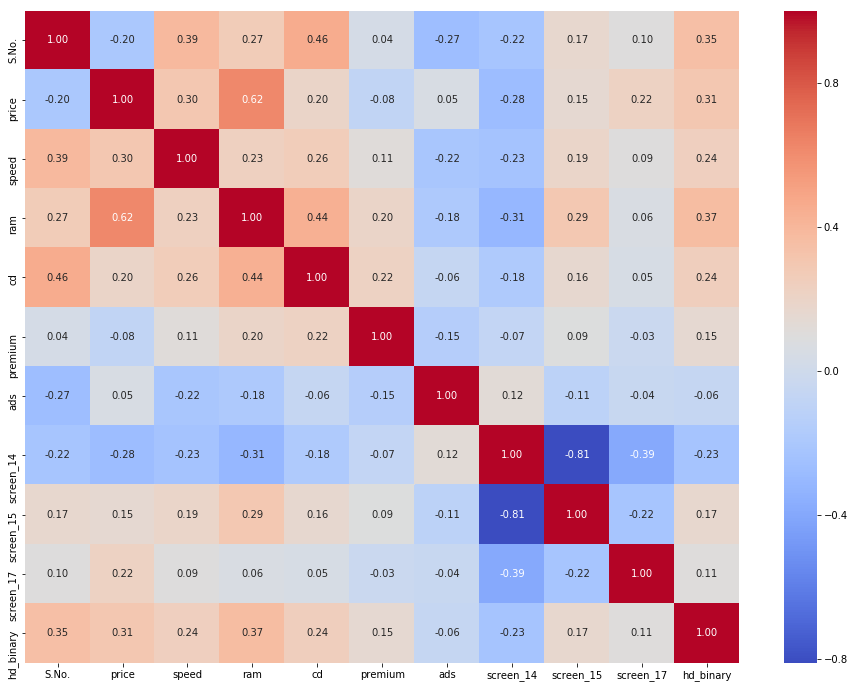

In [148]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

From the heatmap, we can understand that the major factors affecting the price of computers are speed, hd, ram, screen and cd. Now we can plot the heatmap just by taking these attributes

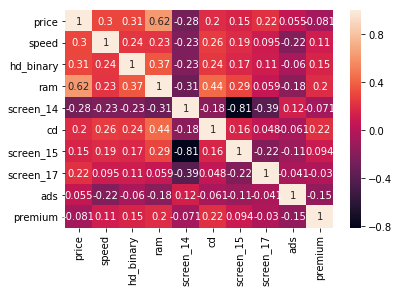

In [149]:
x=df[['price','speed','hd_binary','ram','screen_14','cd','screen_15','screen_17','ads','premium']]
sns.heatmap(x.corr(), annot=True)

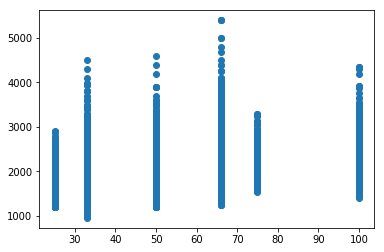

In [150]:
x=df['speed']
y=df['price']

plt.scatter(x, y, )
plt.show()

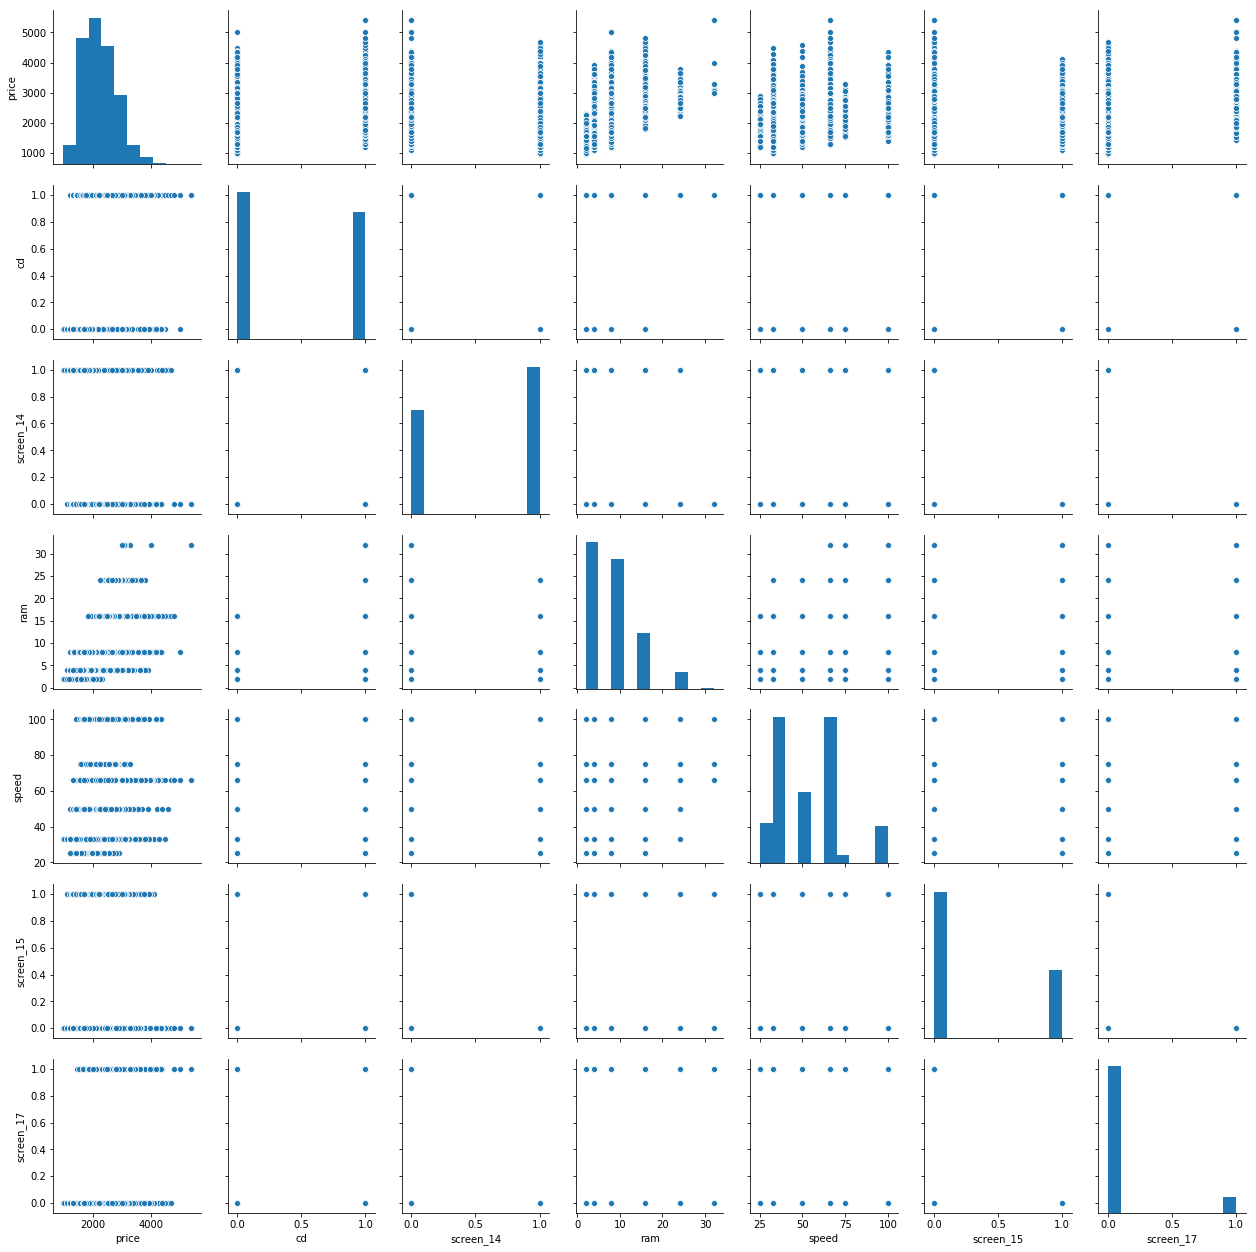

In [151]:

x=df[['price','cd','screen_14','ram','speed','screen_15','screen_17']]
sns.pairplot(x)



In [152]:
y=df[['price']]
x=df[['hd_binary','cd','screen_14','ram','speed','screen_15','screen_17','ads']]
model =sm.OLS(y, x).fit()

In [153]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     905.1
Date:                Sat, 23 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:39:26   Log-Likelihood:                -46525.
No. Observations:                6259   AIC:                         9.307e+04
Df Residuals:                    6251   BIC:                         9.312e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hd_binary     82.7051     16.355      5.057      0.000      50.644     114.766
cd          -172.4952     11.783    -14.639      0.000    -195.595    -149.396
screen_14    972.3178     25.614     37.960      0.000     922.105    1022.530
ram           67.0767      1.114     60.197      0.000      64.892      69.261
speed          5.6226      0.266     21.106      0.000       5.100       6.145
screen_15    974.2000     28.311     34.411      0.000     918.701    1029.699
screen_17   1315.1132     31.508     41.739      0.000    1253.347    1376.880
ads            1.6913      0.072     23.571      0.000       1.551       1.832
==============================================================================
Omnibus:                     1424.013   Durbin-Watson:                   1.407
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3890.802
Skew:                           1.207   Prob(JB):                         0.00
Kurtosis:                       6.015   Cond. No.                     2.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [154]:
train, test = train_test_split(df, test_size=0.3, shuffle=True)
training_features = ['hd_binary','screen_14','cd','ram','speed','screen_15','screen_17','ads']
target = 'price'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [155]:
model = LinearRegression()
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 409.6335567411017 msle_train: 0.03409017741002896
rmse_test: 408.65691577495375 msle_test: 0.03300723821901886


In [156]:
def variance_IF(x):
    vif=vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif["features"] = x.columns
    return vif

variance_IF(x)

,VIF Factor,features
0,1.210681,hd_binary
1,1.288879,cd
2,14.320808,screen_14
3,1.469018,ram
4,1.185333,speed
5,9.519332,screen_15
6,3.586902,screen_17
7,1.075886,ads


## Model2

In [167]:
y=df[['price']]
x=df[['hd_binary','ram','speed','ads','cd']]
model =sm.OLS(y, x).fit()

In [168]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 2.921e+04
Date:                Sat, 23 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:40:59   Log-Likelihood:                -47323.
No. Observations:                6259   AIC:                         9.466e+04
Df Residuals:                    6254   BIC:                         9.469e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hd_binary    308.4380     17.458     17.667      0.000     274.214     342.662
ram           74.7980      1.215     61.579      0.000      72.417      77.179
speed         11.0490      0.258     42.887      0.000      10.544      11.554
ads            3.6883      0.054     67.865      0.000       3.582       3.795
cd          -206.0483     13.339    -15.447      0.000    -232.197    -179.899
==============================================================================
Omnibus:                     1037.309   Durbin-Watson:                   1.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2055.677
Skew:                           1.009   Prob(JB):                         0.00
Kurtosis:                       4.952   Cond. No.                         710.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
train, test = train_test_split(df, test_size=0.3, shuffle=True)
training_features = ['hd_binary','ram','speed','ads','cd']
target = 'price'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [170]:
model = LinearRegression()
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 420.86179467017365 msle_train: 0.03533987615912336
rmse_test: 422.83479709335006 msle_test: 0.03603325402293733


## Model 3

In [171]:
y=df[['price']]
x=df[['hd_binary','ram','speed','ads']]
model =sm.OLS(y, x).fit()

In [172]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                 3.512e+04
Date:                Sat, 23 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:43:31   Log-Likelihood:                -47440.
No. Observations:                6259   AIC:                         9.489e+04
Df Residuals:                    6255   BIC:                         9.491e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hd_binary    295.7611     17.767     16.647      0.000     260.932     330.590
ram           68.0102      1.154     58.949      0.000      65.749      70.272
speed         10.4407      0.259     40.250      0.000       9.932      10.949
ads            3.6956      0.055     66.745      0.000       3.587       3.804
==============================================================================
Omnibus:                     1190.781   Durbin-Watson:                   0.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2410.629
Skew:                           1.135   Prob(JB):                         0.00
Kurtosis:                       5.023   Cond. No.                         708.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [173]:
train, test = train_test_split(df, test_size=0.3, shuffle=True)
training_features = ['hd_binary','ram','ads']
target = 'price'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [174]:
model = LinearRegression()
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 436.4119154269035 msle_train: 0.03817305527506428
rmse_test: 451.25339770604535 msle_test: 0.03858246882181937


From the 3 models, we understand that there is very less difference in all the three. However, Adjusted RSquare is maximum in all three models. Also RMSE is also lowest in the first model. That is why we can say first model is the best fit.

## Interaction Effects


1. Interacting hd and cd

In [176]:
ads_cd_model_A = ols("price ~ hd_binary + cd + ram + speed + ads : cd -1", data=df).fit()
ads_cd_model_A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.903e+04
Date:                Sat, 23 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:49:11   Log-Likelihood:                -48595.
No. Observations:                6259   AIC:                         9.720e+04
Df Residuals:                    6254   BIC:                         9.723e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hd_binary    738.3071     19.440     37.979      0.000     700.198     776.416
cd         -1233.3961     36.481    -33.809      0.000   -1304.912   -1161.880
ram           80.9257      1.510     53.583      0.000      77.965      83.886
speed         17.7347      0.300     59.205      0.000      17.147      18.322
ads:cd         4.4513      0.142     31.260      0.000       4.172       4.730
==============================================================================
Omnibus:                       69.798   Durbin-Watson:                   1.217
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.624
Skew:                           0.239   Prob(JB):                     1.03e-16
Kurtosis:                       3.231   Cond. No.                         817.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is a slight improvement in the adjusted Rsquare when we have done the interaction hd and cd. Also AIC and BIC have also improved. This shows that the combined effect of hd and cd has higher effect on pricing than individual predictors

2. Interacting ram and speed


In [177]:
hd_binary_ram_model_B = ols("price ~ hd_binary + cd + ram + speed + hd_binary : ram -1", data=df).fit()
hd_binary_ram_model_B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 2.855e+04
Date:                Sat, 23 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:51:17   Log-Likelihood:                -47391.
No. Observations:                6259   AIC:                         9.479e+04
Df Residuals:                    6254   BIC:                         9.483e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
hd_binary      1412.7767     18.160     77.794      0.000    1377.176    1448.377
cd             -164.7383     13.506    -12.198      0.000    -191.214    -138.262
ram             424.0430      5.452     77.780      0.000     413.355     434.730
speed             7.4066      0.284     26.071      0.000       6.850       7.964
hd_binary:ram  -362.3021      5.480    -66.111      0.000    -373.045    -351.559
==============================================================================
Omnibus:                      515.343   Durbin-Watson:                   1.366
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              899.458
Skew:                           0.596   Prob(JB):                    4.84e-196
Kurtosis:                       4.424   Cond. No.                         179.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This result that the interaction of ram and speed has lesser effect on price on computer as compared to that of its individual effect.

## Regularization

In [211]:
train, test = train_test_split(df, test_size=0.3, shuffle=True)
training_features = ['hd_binary','ram','speed','ads']
target = 'price'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]
xT = np.transpose(train_X)
multMat = np.dot(xT, train_X)
lam = 0.44
iden = lam*np.identity(len(multMat), dtype=float)
addedMat = multMat + iden
invMat = np.linalg.inv(addedMat)
multMat2= np.dot(invMat, xT)
wMat= np.dot(multMat2, train_Y)
train_pred_Y=np.dot(train_X,wMat)
test_pred_Y=np.dot(test_X,wMat)    
print(train_pred_Y)
#calcMSE(wMat, numFeatures)

[2183.56418819 2888.42470952 2205.75226577 ... 2320.41258874 3003.06311035
 1772.85460041]


In [213]:
rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 479.43996259853236 msle_train: 0.05079495365979352
rmse_test: 460.0607178118538 msle_test: 0.04862780500796257


# Logistic Regression


## Checking Model Assumptions

In [ ]:
%matplotlib inline
rcParams['figure.figsize']=5,4
sns.set_style(('whitegrid'))

In [216]:

df.head()

,S.No.,price,speed,ram,cd,premium,ads,screen_14,screen_15,screen_17,hd_binary
0,1,1499,25,4,0,1,94,1,0,0,0
1,2,1795,33,2,0,1,94,1,0,0,0
2,3,1595,25,4,0,1,94,0,1,0,0
3,4,1849,25,8,0,0,94,1,0,0,0
4,5,3295,33,16,0,1,94,1,0,0,1


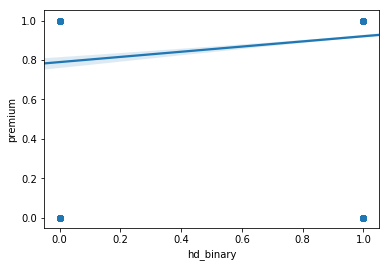

In [215]:
sns.regplot(x='hd_binary',y='premium', data=df, scatter=True)

In [ ]:
sns.regplot(x='cd',y='premium', data=df, scatter=True)

In [ ]:
sns.regplot(x='screen',y='premium', data=df, scatter=True)

In [ ]:
sns.regplot(x='speed',y='premium', data=df, scatter=True)

In [217]:
df_data=df.ix[:,(1,2,3,4,6,9)].values


y=df.ix[:,(5)].values

x=scale(df_data)

LogReg=LogisticRegression()


LogReg.fit(x,y)
print (LogReg.score(x,y))



0.9146828566863716


In [218]:
y_pred=LogReg.predict(x)
from sklearn.metrics import classification_report

print (classification_report(y,y_pred))

             precision    recall  f1-score   support

          0       0.71      0.21      0.33       612
          1       0.92      0.99      0.95      5647

avg / total       0.90      0.91      0.89      6259



In [ ]:
df_data=df.ix[:,(2,3,4,5)].values
df_data_names=['hd','speed','ram','screen','cd']

y=df.ix[:,(7)].values

x=scale(df_data)

LogReg=LogisticRegression()


LogReg.fit(x,y)
print (LogReg.score(x,y))

In [ ]:
y_pred=LogReg.predict(x)
from sklearn.metrics import classification_report

print (classification_report(y,y_pred))

In [219]:
df_data=df.ix[:,(1,2,3,4,6)].values
#df_data_names=['hd','speed','ram','screen','cd']

y=df.ix[:,(5)].values

x=scale(df_data)

LogReg=LogisticRegression()


LogReg.fit(x,y)
print (LogReg.score(x,y))

0.9164403259306598


In [220]:
y_pred=LogReg.predict(x)
from sklearn.metrics import classification_report

print (classification_report(y,y_pred))

             precision    recall  f1-score   support

          0       0.74      0.22      0.34       612
          1       0.92      0.99      0.96      5647

avg / total       0.90      0.92      0.90      6259



In [221]:
df_data=df.ix[:,(1,2,3,6)].values
#df_data_names=['hd','speed','ram','screen','cd']

y=df.ix[:,(5)].values

x=scale(df_data)

LogReg=LogisticRegression()


LogReg.fit(x,y)
print (LogReg.score(x,y))

0.9162805559993609


In [222]:
y_pred=LogReg.predict(x)
from sklearn.metrics import classification_report

print (classification_report(y,y_pred))

             precision    recall  f1-score   support

          0       0.76      0.21      0.33       612
          1       0.92      0.99      0.96      5647

avg / total       0.90      0.92      0.89      6259

